## Write a function which will return best n-th order polynomial coefficients

In [ ]:
import numpy as np

def find_polynomial(x, y, n):
  coeff = np.polyfit(x, y, n)

  pred_values = np.polyval(coeff, x)

  return coeff

x = np.array([2, 3, 6, 5])
y = np.array([3, 5, 4, 7])
n = 3

coeff = find_polynomial(x, y, n)
print(f'Coefficients: {coeff}')

Coefficients: [-0.25        2.16666667 -4.08333333  4.5       ]


Logistic Regression with gradient descent


In [ ]:
from sklearn.datasets import make_classification
import numpy as np

X, y = make_classification(n_samples=100, n_features=10, n_classes=2, class_sep=0.3, random_state=42)
X = np.hstack((np.ones((X.shape[0], 1)), X))
y = y[:, np.newaxis]

def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def sigmoid_cross_entropy(y, y_pred):
  assert y.shape == y_pred.shape , "label and prediction should be equal"
  L = -(np.mean(y*np.log(y_pred) + (1 - y)*np.log(1 - y_pred)))
  return L

def logistic_regression(X, y, learning_rate = 0.01, num_iterations = 10000):
  m, n = X.shape
  theta = np.zeros((n, 1))
  for i in range(num_iterations):
    z = np.dot((X, theta))
    y_pred = sigmoid(z)
    gradient = np.dot(X.T, (y_pred - y)) / m
    theta = theta - learning_rate * gradient
    loss = sigmoid_cross_entropy(y, y_pred)
  return theta

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

theta = logistic_regression(X_train, y_train, num_iterations=10000)
y_pred = sigmoid(np.dot(X_test, theta)) > 0.5
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.9


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

i = load_iris()
X = i.data
y = i.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 55)

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)
predictions = logistic_regression_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.9666666666666667


N-dimentioanl sphere

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def generate_sphere_data(n_samples, n_dimensions):
    X = np.random.randn(n_samples, n_dimensions)
    y = np.linalg.norm(X, axis=1) <= 1
    return X, y.astype(int)

n_samples = 1000
n_dimensions = 10
X, y = generate_sphere_data(n_samples, n_dimensions)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_cross_entropy(y, y_pred):
    '''
    y: labels
    y_pred: probabilistic output in [0,1]
    '''
    assert y.shape == y_pred.shape, "label and prediction shapes should be equal"
    L = -(np.mean(y*np.log(y_pred) + (1-y)*np.log(1-y_pred)))
    return L

def logistic_regression(X, y, learning_rate=0.01, num_iterations=1000):
    m, n = X.shape
    theta = np.zeros((n, 1))
    for i in range(num_iterations):
        z = np.dot(X, theta)
        y_pred = sigmoid(z)
        gradient = np.dot(X.T, (y_pred - y)) / m
        theta = theta - learning_rate * gradient
        loss = sigmoid_cross_entropy(y, y_pred)
        print(f"Step {i}, Loss: {loss}")
    return theta

theta = logistic_regression(X_train, y_train[:, np.newaxis], num_iterations=1000)

y_pred_proba = sigmoid(np.dot(X_test, theta))
y_pred = (y_pred_proba > 0.5).astype(int)

Step 0, Loss: 0.6931471805599452
Step 1, Loss: 0.6906302202749921
Step 2, Loss: 0.688126025657273
Step 3, Loss: 0.6856345312939979
Step 4, Loss: 0.6831556719464096
Step 5, Loss: 0.680689382552714
Step 6, Loss: 0.678235598230942
Step 7, Loss: 0.6757942542817432
Step 8, Loss: 0.6733652861911134
Step 9, Loss: 0.6709486296330534
Step 10, Loss: 0.668544220472165
Step 11, Loss: 0.6661519947661801
Step 12, Loss: 0.6637718887684235
Step 13, Loss: 0.6614038389302163
Step 14, Loss: 0.6590477819032103
Step 15, Loss: 0.6567036545416659
Step 16, Loss: 0.6543713939046623
Step 17, Loss: 0.6520509372582513
Step 18, Loss: 0.6497422220775466
Step 19, Loss: 0.6474451860487573
Step 20, Loss: 0.6451597670711575
Step 21, Loss: 0.642885903259002
Step 22, Loss: 0.6406235329433811
Step 23, Loss: 0.6383725946740195
Step 24, Loss: 0.6361330272210189
Step 25, Loss: 0.6339047695765447
Step 26, Loss: 0.6316877609564575
Step 27, Loss: 0.6294819408018906
Step 28, Loss: 0.6272872487807738
Step 29, Loss: 0.625103624789

Parrot picture with PCA


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image

def reduce_colors(image_path, k):
    image = Image.open(image_path)
    img_array = np.array(image)
    pixels = img_array.reshape(-1, img_array.shape[-1]) to the pixels
    kmeans = KMeans(n_clusters=k, random_state=0).fit(pixels)
    labels = kmeans.predict(pixels)
    centers = kmeans.cluster_centers_
    new_pixels = centers[labels].reshape(img_array.shape)
    return Image.fromarray(np.uint8(new_pixels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


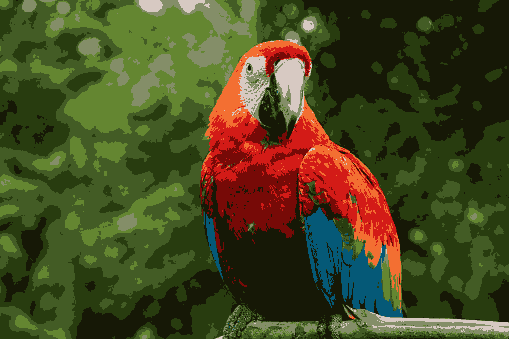

In [ ]:
from IPython.display import display
image_path = "parrot.jpeg"
k = 10
new_image = reduce_colors("parrot.jpeg", k)
display(new_image)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


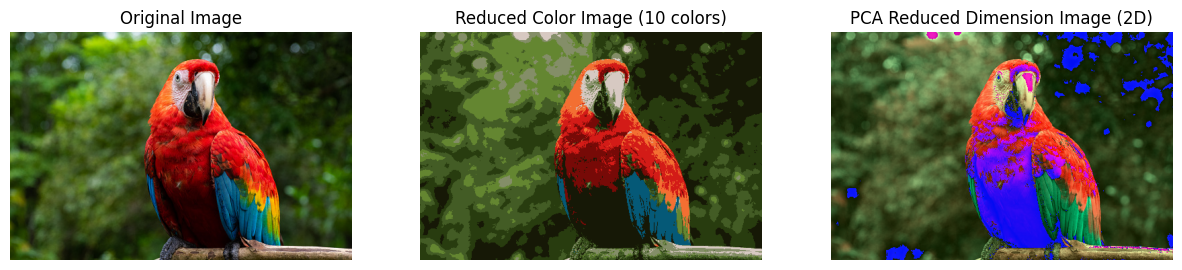

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def reduce_colors_and_dimensions(image_path, k):

    image = Image.open(image_path)
    img_array = np.array(image)

    pixels = img_array.reshape(-1, img_array.shape[-1])

    kmeans = KMeans(n_clusters=k, random_state=0).fit(pixels)

    labels = kmeans.predict(pixels)
    centers = kmeans.cluster_centers_

    new_pixels = centers[labels].reshape(img_array.shape)

    reduced_color_image = Image.fromarray(np.uint8(new_pixels))

    pca = PCA(n_components=2)
    components = pca.fit_transform(pixels)
    reduced_pixels = pca.inverse_transform(components)
    reduced_image_array = reduced_pixels.reshape(img_array.shape)

    reduced_dimension_image = Image.fromarray(np.uint8(reduced_image_array))

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(reduced_color_image)
    plt.title('Reduced Color Image ({} colors)'.format(k))
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(reduced_dimension_image)
    plt.title('PCA Reduced Dimension Image (2D)')
    plt.axis('off')

    plt.show()

image_path = "parrot.jpeg"
k = 10
reduce_colors_and_dimensions(image_path, k)

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

class Net(torch.nn.Module):
    def __init__(self, layer_sizes):
        super(Net, self).__init__()
        input_size, h1, h2, output_size = layer_sizes
        self.fc1 = torch.nn.Linear(input_size, h1)
        self.fc2 = torch.nn.Linear(h1, h2)
        self.fc3 = torch.nn.Linear(h2, output_size)

    def forward(self, x):
        x = x.view(-1, x.shape[-2] * x.shape[-1])
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

input_feat_no = trainset[0][0].shape[-2] * trainset[0][0].shape[-1]
layer_sizes = [input_feat_no, 256, 128, 10]
net = Net(layer_sizes)
loss_function = torch.nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
epoch_num = 2
steps_for_loss = 200
for epoch in range(epoch_num):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = loss_function(outputs, torch.nn.functional.one_hot(labels, num_classes=10).float())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % steps_for_loss == steps_for_loss - 1:
            print('epoch={}, step={} loss: {}'.format(epoch+1, i+1, running_loss / steps_for_loss))
            running_loss = 0.0

print('Finished Training')

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total}')

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 3609455.15it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 513484.83it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3956887.44it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7997703.09it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

epoch=1, step=200 loss: 0.08867391090840102
epoch=1, step=400 loss: 0.075647631585598
epoch=1, step=600 loss: 0.06832938577979802
epoch=1, step=800 loss: 0.06289817202836274
epoch=2, step=200 loss: 0.05587053207680583
epoch=2, step=400 loss: 0.05243110021576285
epoch=2, step=600 loss: 0.05041425611823797
epoch=2, step=800 loss: 0.04857195507735014
Finished Training
Accuracy of the network on the 10000 test images: 81.44
